In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv('data/progress_look_trained_2.csv')

In [27]:
def plot_results(df, model_name):
    labels = model_name +"\n"+ df.version.astype(str)
    x = np.arange(len(labels))  # the label locations
    width = 0.60  # the width of the bars
    fig, ax = plt.subplots(figsize=(20, 10))
    rects1 = ax.bar(x - width/3, df['vs negamax win'], width/3, label='Negamax')
    rects2 = ax.bar(x, df['vs random win'], width/3, label='Random')
    rects3 = ax.bar(x + width/3, df['vs adv_agent win'], width/3, label='Lookahead')


    ax.set_ylabel('score')
    ax.set_title('Scores by model')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=2)
    ax.bar_label(rects2, padding=2)
    ax.bar_label(rects3, padding=2)

    fig.tight_layout()

    plt.show()

def plot_top_3(df):
    top_3 = df.sort_values(by=['vs negamax'])
    plot_results(top_3[-3:])


In [28]:
df.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score
0,look_trained_2,10000,0.69,0,0.05,0,0.01,0,0.6
1,look_trained_2,20000,0.73,0,0.02,0,0.02,0,0.7
2,look_trained_2,30000,0.70,0,0.00,0,0.03,0,0.7
3,look_trained_2,40000,0.72,0,0.00,0,0.06,0,0.7
4,look_trained_2,50000,0.69,0,0.01,0,0.01,0,0.6


In [47]:

#filtered_df=df[(df.score < 40) & (df.C_3 > 450)]
db_by_score = df.sort_values(by=['vs adv_agent win'], ascending=False)

db_by_score.head()

,model,version,vs random win,vs random invalid,vs adv_agent win,vs adv_agent invalid,vs negamax win,vs negamax invalid,score
118,look_trained_2,1190000,0.73,0,0.39,0,0.02,0,2.2
104,look_trained_2,1050000,0.70,0,0.39,0,0.08,0,2.2
85,look_trained_2,860000,0.73,0,0.36,0,0.02,0,2.2
106,look_trained_2,1070000,0.72,0,0.36,0,0.04,0,2.2
103,look_trained_2,1040000,0.75,0,0.35,0,0.03,0,2.2


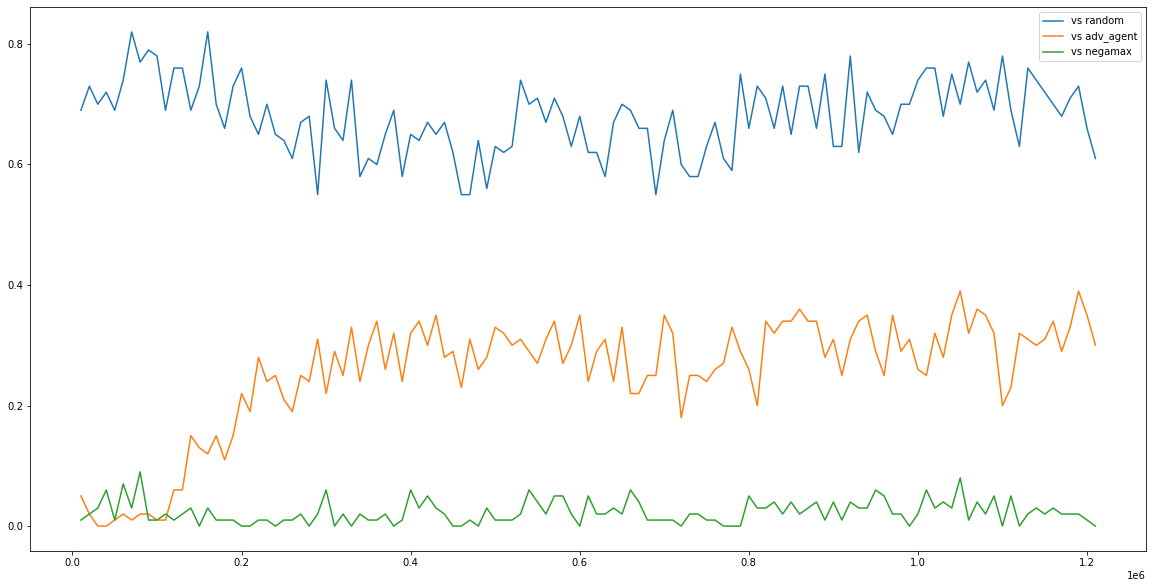

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
df_ppo = df.sort_values(by=['version'])

ax.plot(df['version'], df['vs random win'], label="vs random")
ax.plot(df['version'], df['vs adv_agent win'], label="vs adv_agent")
ax.plot(df['version'], df['vs negamax win'], label="vs negamax")

ax.legend()

plt.show()